In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

In [2]:
raw_data = pd.ExcelFile('dataset/data.xlsx')
data = raw_data.parse('train')
data.head()

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,No,988.0,15.0,796.0,Female,Single,Yes,No,No,No,employed,1536.0,3455,12.0,38.0,1.0
1,102,No,458.0,15.0,813.0,Female,Single,Yes,No,No,No,employed,947.0,3600,25.0,36.0,1.0
2,103,No,158.0,14.0,756.0,Female,Single,No,Yes,No,No,employed,1678.0,3093,43.0,34.0,1.0
3,104,Yes,300.0,25.0,737.0,Female,Single,No,No,No,Yes,employed,1804.0,2449,0.0,29.0,1.0
4,105,Yes,63.0,24.0,662.0,Female,Single,No,No,No,Yes,unemployed,1184.0,2867,4.0,30.0,1.0


### Basic Exploratory Analysis with Pandas profiling report

In [3]:
profile = data.profile_report(title="Pandas Profiling Report")
profile.to_file('profile_report.html')

D:\Softwares\Anaconda\envs\datacamp\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


`The report warned of an unknown feature Education_loan`

In [4]:
data['Education_loan'].unique()

array(['No', 'Yes', nan, 0, 1], dtype=object)

#### Looks like this might be a data collection issue. Hence, let us clean it

In [5]:
data.loc[data['Education_loan'] == 1, 'Education_loan'] = 'Yes'
data.loc[data['Education_loan'] == 0, 'Education_loan'] = 'No'
data['Education_loan'].unique()

array(['No', 'Yes', nan], dtype=object)

In [6]:
data.isna().sum()

ID                  0
Default             1
Checking_amount     1
Term                1
Credit_score        2
Gender              0
Marital_status      0
Car_loan            1
Personal_loan       3
Home_loan           2
Education_loan      1
Emp_status          0
Amount              1
Saving_amount       0
Emp_duration        3
Age                 1
No_of_credit_acc    1
dtype: int64

#### The amount of NA values are less, so let us drop such values

In [7]:
data = data.dropna()
data.shape

(800, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 803
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                800 non-null    int64  
 1   Default           800 non-null    object 
 2   Checking_amount   800 non-null    float64
 3   Term              800 non-null    float64
 4   Credit_score      800 non-null    float64
 5   Gender            800 non-null    object 
 6   Marital_status    800 non-null    object 
 7   Car_loan          800 non-null    object 
 8   Personal_loan     800 non-null    object 
 9   Home_loan         800 non-null    object 
 10  Education_loan    800 non-null    object 
 11  Emp_status        800 non-null    object 
 12  Amount            800 non-null    float64
 13  Saving_amount     800 non-null    int64  
 14  Emp_duration      800 non-null    float64
 15  Age               800 non-null    float64
 16  No_of_credit_acc  800 non-null    float64
dt

#### Perform label encoding on nominal variables

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# le = LabelEncoder()
# le.fit(data.Gender)
# mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# mapping
mapping = {}
# new_data = pd.DataFrame()
for f in data.columns:
    if data[f].dtype == 'object':
        print(f)
        le = LabelEncoder()
        le.fit(list(data[f].values))
        mapping[f] = (dict(zip(le.classes_, le.transform(le.classes_))))
        data[f] = le.transform(list(data[f].values))
print(mapping)
data.head()

Default
Gender
Marital_status 
Car_loan
Personal_loan
Home_loan
Education_loan
Emp_status
{'Default': {'No': 0, 'Yes': 1}, 'Gender': {'Female': 0, 'Male': 1}, 'Marital_status ': {'Married': 0, 'Single': 1}, 'Car_loan': {'No': 0, 'Yes': 1}, 'Personal_loan': {'No': 0, 'Yes': 1}, 'Home_loan': {'No': 0, 'Yes': 1}, 'Education_loan': {'No': 0, 'Yes': 1}, 'Emp_status': {'employed': 0, 'unemployed': 1}}


D:\Softwares\Anaconda\envs\datacamp\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,0,988.0,15.0,796.0,0,1,1,0,0,0,0,1536.0,3455,12.0,38.0,1.0
1,102,0,458.0,15.0,813.0,0,1,1,0,0,0,0,947.0,3600,25.0,36.0,1.0
2,103,0,158.0,14.0,756.0,0,1,0,1,0,0,0,1678.0,3093,43.0,34.0,1.0
3,104,1,300.0,25.0,737.0,0,1,0,0,0,1,0,1804.0,2449,0.0,29.0,1.0
4,105,1,63.0,24.0,662.0,0,1,0,0,0,1,1,1184.0,2867,4.0,30.0,1.0


#### Split the data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop('Default', axis = 1)
y = data.Default

In [13]:
print('X = ', X.shape)
print('y = ', y.shape)

X =  (800, 16)
y =  (800,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
print('Train size = ', X_train.shape)
print('Test size = ', X_test.shape)

Train size =  (640, 16)
Test size =  (160, 16)


In [16]:
X_train.tail()

,ID,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
72,173,159.0,25.0,736.0,0,1,0,1,0,0,0,1274.0,3044,99.0,40.0,1.0
107,208,-48.0,20.0,716.0,1,0,1,0,0,0,0,1384.0,3023,27.0,22.0,1.0
271,372,327.0,19.0,803.0,1,0,0,1,0,0,0,1315.0,3437,42.0,37.0,2.0
437,538,986.0,25.0,736.0,1,1,0,0,0,1,1,1140.0,3257,32.0,25.0,1.0
103,204,147.0,18.0,528.0,0,1,0,1,0,0,0,1429.0,2956,20.0,27.0,1.0


#### Apply a baseline model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc

In [20]:
f1_score(y_test, y_pred)

0.7474747474747475

In [21]:
accuracy_score(y_test, y_pred)

0.84375

#### Visualize the decision tree grown

In [22]:
from sklearn import tree
import graphviz

In [23]:
dot_data = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(dot_data, format = 'png')
graph.render('decision_tree')

'decision_tree.png'

#### Look at feature importances considered by the model

In [24]:
def feature_importance(model, X):
    importance = model.feature_importances_
    for f, imp in zip(X.columns.values, importance):
        print('Feature: {}, Score: {}'.format(f, imp))
    plt.bar(X.columns.values, importance)
    plt.xticks(rotation = 90)
    plt.show()

Feature: ID, Score: 0.02080515942439711
Feature: Checking_amount, Score: 0.1652552407936375
Feature: Term, Score: 0.0013074450403125007
Feature: Credit_score, Score: 0.12874455416095412
Feature: Gender, Score: 0.0
Feature: Marital_status , Score: 0.0
Feature: Car_loan, Score: 0.0037426900584795323
Feature: Personal_loan, Score: 0.0
Feature: Home_loan, Score: 0.0
Feature: Education_loan, Score: 0.007017543859649123
Feature: Emp_status, Score: 0.0
Feature: Amount, Score: 0.04548078721153433
Feature: Saving_amount, Score: 0.08937600980367096
Feature: Emp_duration , Score: 0.023722896986054877
Feature: Age, Score: 0.4806064092463623
Feature: No_of_credit_acc, Score: 0.03394126341494763


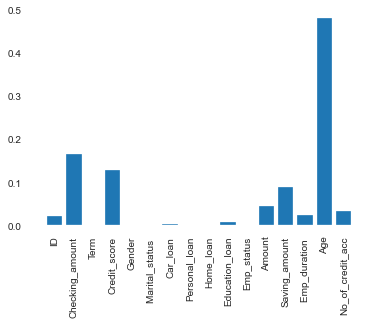

In [25]:
feature_importance(model, X_train)

`Observe that ID feature is given some importance by the model which is not desirable. Hence we will have to remove this feature. Also, the Gender feature should typically not play a role which deciding on whether to give a loan or not. Hence, we will remove this Gender feature as well. The most important feature has turned out to be Age, so let us look at what are values of this feature.`

In [26]:
trim_data = data.drop(['ID', 'Gender'], axis = 1)
trim_data.tail()

,Default,Checking_amount,Term,Credit_score,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
799,0,393.0,18.0,846.0,1,0,1,0,0,1,1603.0,3282,54.0,31.0,1.0
800,0,462.0,21.0,810.0,1,1,0,0,0,1,1435.0,3873,110.0,32.0,1.0
801,0,717.0,17.0,739.0,0,1,0,0,0,1,1669.0,3453,32.0,31.0,2.0
802,0,822.0,17.0,783.0,0,0,1,0,0,1,1041.0,3312,43.0,34.0,2.0
803,1,512.0,18.0,601.0,0,1,0,0,0,1,997.0,3060,104.0,26.0,1.0


In [27]:
trim_data.Age.unique()

array([38., 36., 34., 29., 30., 32., 25., 31., 24., 33., 35., 37., 28.,
       27., 20., 26., 23., 22., 39., 40., 19., 42., 41., 21., 18.])

`Since most of the values are between 20 & 40, let us introduce a new categorical feature that identifies if age > 30`

In [28]:
def age_bin(age):
    if age < 30:
        return 1
    else:
        return 0

In [29]:
trim_data['ageBin'] = trim_data['Age'].map(age_bin)
trim_data['ageBin'].value_counts()

0    544
1    256
Name: ageBin, dtype: int64

#### Apply the decision tree algorithm on this engineered dataset

In [30]:
X = trim_data.drop('Default', axis = 1)
y = trim_data.Default

0.7472527472527473
Feature: Checking_amount, Score: 0.16192165550164722
Feature: Term, Score: 0.006549707602339181
Feature: Credit_score, Score: 0.12020008526560803
Feature: Marital_status , Score: 0.005703146755778335
Feature: Car_loan, Score: 0.008930418738468272
Feature: Personal_loan, Score: 0.0
Feature: Home_loan, Score: 0.0
Feature: Education_loan, Score: 0.012411420708634333
Feature: Emp_status, Score: 0.0
Feature: Amount, Score: 0.03608395701898418
Feature: Saving_amount, Score: 0.10609109043454108
Feature: Emp_duration , Score: 0.040689758584495424
Feature: Age, Score: 0.026934248312367483
Feature: No_of_credit_acc, Score: 0.028238116659169293
Feature: ageBin, Score: 0.4462463944179672


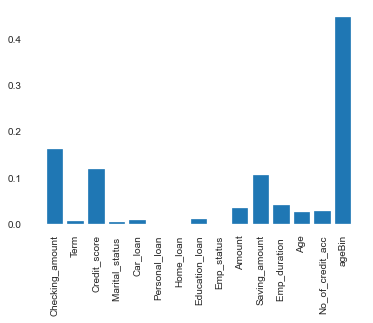

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model2 = DecisionTreeClassifier(random_state = 42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(f1_score(y_test, y_pred))
feature_importance(model2, X_train)

`Notice that ageBin now has the highest importance & since it was derived from the Age feature, the importance of Age feature reduced`

In [32]:
dot_data = tree.export_graphviz(model2, out_file = None)
graph = graphviz.Source(dot_data, format = 'png')
graph.render('decision_tree2')

'decision_tree2.png'

#### Look at the impact that a few hyperparameters have on the model, starting with max_depth

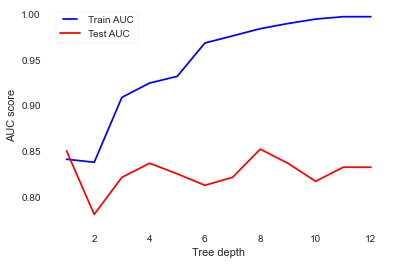

In [33]:
max_depths = np.linspace(1, 12, 12, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   fpr, tpr, thresh = roc_curve(y_train, train_pred)
   roc_auc = auc(fpr, tpr)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   fpr, tpr, thresh = roc_curve(y_test, y_pred)
   roc_auc = auc(fpr, tpr)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

`Notice that as the max_depth is increased, the training score is getting better to a point where it totally overfits the training data at max_depth = 12. But the test score is not improving & max score is obtained at max_depths of 1 & 8.`

#### Now, let us vary the min_samples_leaf parameter & observe its impact on the model

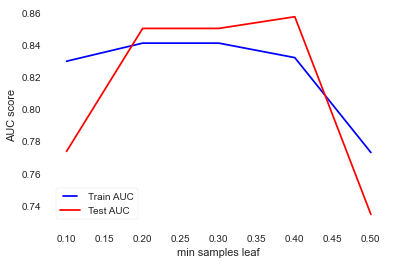

In [34]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state = 42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   fpr, tpr, thresh = roc_curve(y_train, train_pred)
   roc_auc = auc(fpr, tpr)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   fpr, tpr, thresh = roc_curve(y_test, y_pred)
   roc_auc = auc(fpr, tpr)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

`We observe that when min_samples_leaf is between 0.2 to 0.3, the scores obtained are relatively stable'

#### Now, observe the same for min_impurity_decrease hyperparameter

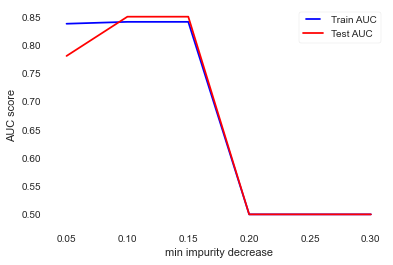

In [35]:
min_imp_dec = np.linspace(0.05, 0.30, 6, endpoint=True)
train_results = []
test_results = []
for val in min_imp_dec:
   dt = DecisionTreeClassifier(min_impurity_decrease = val, random_state = 42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   fpr, tpr, thresh = roc_curve(y_train, train_pred)
   roc_auc = auc(fpr, tpr)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   fpr, tpr, thresh = roc_curve(y_test, y_pred)
   roc_auc = auc(fpr, tpr)
   test_results.append(roc_auc)

line1, = plt.plot(min_imp_dec, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_imp_dec, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min impurity decrease')
plt.show()

`Observe that when min_impurity_decrease is between 0.1 & 0.15, the scores obtained are better`

#### Retain the values for min_samples_leaf & min_impurity_decrease & perform hyperparameter tuning on max_depth & criterioin parameters

In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [37]:
param_grid = {'max_depth': range(1,12),
             'criterion': ['gini', 'entropy']}
#              'min_samples_split': range(10, 50, 10),
#              'min_impurity_decrease': np.arange(0.05, 0.21, 0.05)}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42, min_samples_leaf = 0.2, min_impurity_decrease = 0.1), 
                              param_grid, cv=5)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=1, min_impurity_decrease=0.1,
                       min_samples_leaf=0.2, random_state=42)

`Observe that the best model obtained is having max_depth = 1 which means that most of the defaults can be predicted with just one feature. To understand which feature is that, we will look at the feature importances`

In [38]:
y_pred = grid_search_cv.best_estimator_.predict(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.7708333333333334
0.8625


Feature: Checking_amount, Score: 0.0
Feature: Term, Score: 0.0
Feature: Credit_score, Score: 0.0
Feature: Marital_status , Score: 0.0
Feature: Car_loan, Score: 0.0
Feature: Personal_loan, Score: 0.0
Feature: Home_loan, Score: 0.0
Feature: Education_loan, Score: 0.0
Feature: Emp_status, Score: 0.0
Feature: Amount, Score: 0.0
Feature: Saving_amount, Score: 0.0
Feature: Emp_duration , Score: 0.0
Feature: Age, Score: 0.0
Feature: No_of_credit_acc, Score: 0.0
Feature: ageBin, Score: 1.0


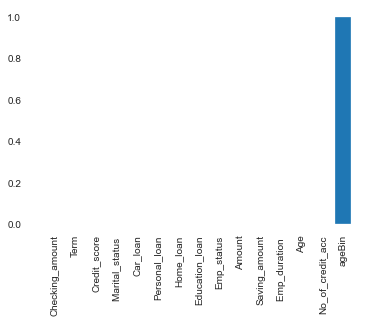

In [39]:
feature_importance(grid_search_cv.best_estimator_, X_train)

`The single most important featue is ageBin`

In [40]:
dot_data = tree.export_graphviz(grid_search_cv.best_estimator_, out_file = None)
graph = graphviz.Source(dot_data, format = 'png')
graph.render('grid_search')

'grid_search.png'

#### Having done pre-pruning, we now look at scikit-learn's attempt at post-pruning with ccp_alpha parameter

In [41]:
pp_model = DecisionTreeClassifier(random_state = 42)
path = pp_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

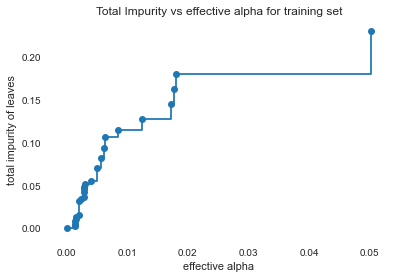

In [42]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

`From the above plot, we notice that when alpha = 0, the value to be minimized is just the RMSE which is nothing but the vanilla decision tree model that we obtained. Since this model constructs a tree that goes all the way down to having impurity = 0 in the leaf nodes, we see from the graph the total impurity of all the leaf nodes = 0. However, as alpha increases, some of the subtrees are being pruned & hence there is some amount of impurity in the leaf nodes. Hence, we notice the total impurity to increase with alpha`

In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18629915391961033


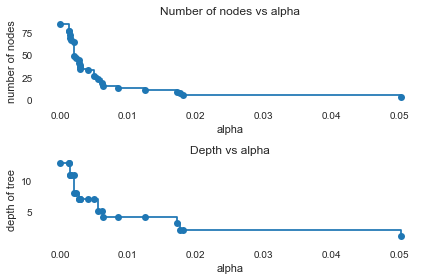

In [44]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

`Again from the above plots, we can observe that as alpha increase, due to more amount of pruning, both the number of nodes & the depth of the tree decreases`

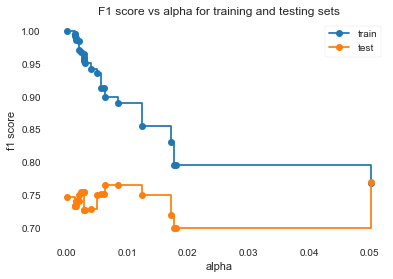

In [45]:
train_scores = [f1_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("f1 score")
ax.set_title("F1 score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

`Here, we observe the test score being being slightly better at high alpha values compared to when alpha = 0`

In [47]:
ccp_alphas

array([0.        , 0.00136719, 0.00136719, 0.00145833, 0.00152616,
       0.0015625 , 0.00208333, 0.00211979, 0.00238095, 0.0028125 ,
       0.00282738, 0.00291358, 0.00292969, 0.00299479, 0.00405134,
       0.00494812, 0.005625  , 0.00616316, 0.00638021, 0.00851433,
       0.01251302, 0.01719586, 0.01771938, 0.01810349, 0.0501746 ])

In [49]:
model = DecisionTreeClassifier(random_state = 42, ccp_alpha = ccp_alphas[-1])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.7708333333333334

Feature: Checking_amount, Score: 0.0
Feature: Term, Score: 0.0
Feature: Credit_score, Score: 0.0
Feature: Marital_status , Score: 0.0
Feature: Car_loan, Score: 0.0
Feature: Personal_loan, Score: 0.0
Feature: Home_loan, Score: 0.0
Feature: Education_loan, Score: 0.0
Feature: Emp_status, Score: 0.0
Feature: Amount, Score: 0.0
Feature: Saving_amount, Score: 0.0
Feature: Emp_duration , Score: 0.0
Feature: Age, Score: 0.0
Feature: No_of_credit_acc, Score: 0.0
Feature: ageBin, Score: 1.0


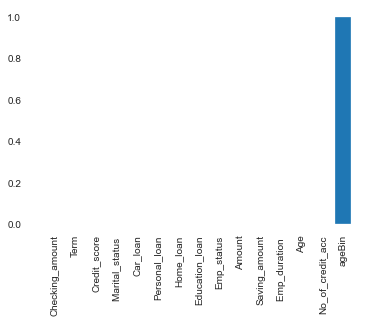

In [51]:
feature_importance(model, X_train)

In [52]:
dot_data = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(dot_data, format = 'png')
graph.render('post-pruned-tree')

'post-pruned-tree.png'

`So for this dataset, we notice that pre-pruning & post-pruning with ccp alpha turned out to give similar models`